<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/defesa/PSD_histogram_final_amostra_03_nov_22_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [ ]:
!pip install mahotas

In [ ]:
import mahotas.features.texture as mht
import mahotas.features

In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [ ]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip' 
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado


In [ ]:
labels =[]
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)
print(labels)

['Fotos_Grandes-3cdAmostra/Q6-8-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-1.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-1.jpg', 'Fotos_Grandes-3cdAmostr

In [ ]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[4] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [ ]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [ ]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [ ]:
df=Segmenta(img)
Img_Size = 28

In [ ]:
print(df)

    Width           0           1  ...         781         782         783
0     180  145.719513  150.013351  ...  101.761482  138.450378  107.141251
1     191  166.213730  169.232727  ...  157.971970  161.132874  156.439804
2     187  244.189804  187.140671  ...  163.978333  162.558334  165.163589
3     144  200.745377  148.200607  ...  156.721451  151.279327  140.120377
4     109  184.045959  183.017609  ...  192.236679  196.926514  203.937225
5     166  142.251556  138.279709  ...  140.374939  140.610107  158.666992
6     127   66.022690   66.545479  ...  145.395187  153.718643  155.329788
7     113  173.522049  174.167496  ...  175.562225  173.831619  157.014801
8     199  144.099640  142.534622  ...    1.000000    0.814979    0.000000
9     181  158.586319  147.640015  ...    1.230060    0.129025    1.333323
10    179   69.376610   68.343681  ...    1.000000    1.000000    1.127587
11    103  165.650391  189.363068  ...  114.038834  113.347061  126.937775
12    170  198.000153  20

In [ ]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [ ]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [ ]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [ ]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 64, 128, 256 '
N1 = 20
N2 = 20

# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:

# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)

Epoch 1/200
11/11 [==============================] - 3s 162ms/step - loss: 0.6682 - accuracy: 0.7085 - val_loss: 0.6930 - val_accuracy: 0.5102
Epoch 2/200
11/11 [==============================] - 1s 130ms/step - loss: 0.3534 - accuracy: 0.8513 - val_loss: 0.6928 - val_accuracy: 0.5102
Epoch 3/200
11/11 [==============================] - 1s 131ms/step - loss: 0.2552 - accuracy: 0.8921 - val_loss: 0.6927 - val_accuracy: 0.5102
Epoch 4/200
11/11 [==============================] - 1s 133ms/step - loss: 0.1808 - accuracy: 0.9329 - val_loss: 0.6927 - val_accuracy: 0.5102
Epoch 5/200
11/11 [==============================] - 1s 131ms/step - loss: 0.1008 - accuracy: 0.9708 - val_loss: 0.6929 - val_accuracy: 0.5102
Epoch 6/200
11/11 [==============================] - 1s 131ms/step - loss: 0.0801 - accuracy: 0.9621 - val_loss: 0.6930 - val_accuracy: 0.5102
Epoch 7/200
11/11 [==============================] - 1s 131ms/step - loss: 0.1240 - accuracy: 0.9563 - val_loss: 0.6921 - val_accuracy: 0.5102

In [ ]:
Y_test = yback(Y_test)

In [ ]:
# pred_test= model.predict_classes(X_test)
pred_test = np.argmax(model.predict(X_test), axis=-1)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

Predict   0   1
Actual         
0        65   7
1         2  73


In [ ]:
print(METRICS)

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        72
           1       0.91      0.97      0.94        75

    accuracy                           0.94       147
   macro avg       0.94      0.94      0.94       147
weighted avg       0.94      0.94      0.94       147



In [ ]:
'''
#X =np.array(df.copy())/255.0 
X =np.array(df.copy())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)
model = MLPClassifier(hidden_layer_sizes=(200,10), activation='tanh', solver='adam',random_state=1, max_iter=300).fit(X_train,y_train)  
prediction = model.predict(X_test)  
y =np.copy(y_test)
data = {'y_true': y_test,'y_predict': prediction}  
# este dado esta no formato de dicionario
df = pd.DataFrame(data, columns=['y_true','y_predict'])
confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)
y_true = df['y_true']
y_pred = df['y_predict']  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)
print(METRICS)
#X =np.array(df.copy())/255.0 X =np.array(df_all.copy())X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)model = MLPClassifier(hidden_layer_sizes=(200,10), activation='tanh',                       solver='adam',random_state=1, max_iter=300).fit(X_train,y_train)  prediction = model.predict(X_test)  y =np.copy(y_test)data = {'y_true': y_test,'y_predict': prediction}  # este dado esta no formato de dicionariodf = pd.DataFrame(data, columns=['y_true','y_predict'])confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])print(confusion_matrix)y_true = df['y_true']y_pred = df['y_predict']
'''

"\n#X =np.array(df.copy())/255.0 \nX =np.array(df.copy())\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)\nmodel = MLPClassifier(hidden_layer_sizes=(200,10), activation='tanh', solver='adam',random_state=1, max_iter=300).fit(X_train,y_train)  \nprediction = model.predict(X_test)  \ny =np.copy(y_test)\ndata = {'y_true': y_test,'y_predict': prediction}  \n# este dado esta no formato de dicionario\ndf = pd.DataFrame(data, columns=['y_true','y_predict'])\nconfusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])\nprint(confusion_matrix)\ny_true = df['y_true']\ny_pred = df['y_predict']  \nMETRICS=sklearn.metrics.classification_report(y_true, y_pred)\nprint(METRICS)\n#X =np.array(df.copy())/255.0 X =np.array(df_all.copy())X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)model = MLPClassifier(hidden_layer_sizes=(200,10), activation='ta

In [ ]:
pred_test

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [ ]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[4] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)
  result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
  #prediction = model.predict_classes(result)
  prediction= np.argmax(model.predict(result), axis=-1)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

    Width           0           1  ...         781         782         783
3   140.0   94.599998  104.799995  ...  155.080002  150.959991  145.440002
7   199.0   69.949287   81.643486  ...  159.012558  160.725571  165.267303
8   182.0   98.171608   99.284035  ...  157.224869  124.544388   58.508873
9   194.0  250.763199  251.585587  ...  188.782745  181.773499  184.002014
14  161.0  162.155014  169.920624  ...  161.387512  150.964081  148.801514
16  174.0  188.315613  177.896042  ...  137.941757  132.752289  140.082718
17  154.0  182.008270  192.487625  ...  230.157028  244.355377  249.247955
18  167.0    1.842590    3.006490  ...  111.883438  123.575790  123.373558
20  164.0  102.621651  109.965508  ...  178.772156  175.673996  166.965485
21  135.0   69.492668   85.651016  ...  142.175400  171.969437  178.589020
22  198.0  172.701447  188.410049  ...  174.727997  174.466461  164.208954
26  159.0  207.110413  208.191452  ...  179.635300  194.136978  196.263306
27  145.0  188.609756  19

In [ ]:
Width=np.array(Width_new)

In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

fatal: destination path 'marquesgabi_paper_fev_2021' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
#!git clone https://github.com/marquesgabi/Doutorado
%cd marquesgabi_out_2020
#%cd Doutorado
#PSD_imageJ = 'Amostra7.csv' 
#PSD_new = pd.read_csv(PSD_imageJ,sep=';')
#encoding='utf8'

PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

fatal: destination path 'marquesgabi_out_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


In [ ]:
PSD_new.shape

(95, 2)

In [ ]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [ ]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
3,140.0,94.599998,104.799995,109.360001,107.599998,104.720001,97.919998,90.320000,85.159996,86.759995,95.599998,103.000000,110.799995,117.040001,120.439995,111.119995,75.559998,33.639999,34.719997,27.400000,49.200001,62.119999,65.959999,66.919998,68.680000,71.400002,62.919998,64.320000,72.119995,100.239998,107.320000,111.320000,111.479996,101.279999,97.879997,90.559998,83.439995,93.000000,103.639999,109.279999,...,106.479996,107.759995,108.639999,117.159996,127.159996,142.679993,152.519989,154.440002,154.879990,157.000000,159.639999,154.599991,131.479996,131.000000,130.759995,131.520004,131.360001,127.279999,126.919998,128.000000,127.399994,119.599998,116.399994,112.079994,106.079994,106.239998,108.239998,111.239998,107.040001,105.399994,105.279999,112.439995,132.599991,150.759995,155.479996,156.599991,154.919998,155.080002,150.959991,145.440002
7,199.0,69.949287,81.643486,107.144165,111.906517,108.416084,113.340179,136.402222,165.753708,157.173203,150.569366,151.194351,167.711060,179.245926,160.467850,143.909119,136.633026,133.548401,135.412445,141.338440,144.703110,143.970703,146.903458,132.437546,120.644730,137.572708,164.816605,161.962997,157.071869,176.374237,161.341019,110.165688,105.967575,103.322166,113.065849,135.239899,153.760757,151.544388,151.784546,152.592148,...,202.189285,195.843216,187.662216,191.851151,198.245087,206.753311,201.158249,179.313797,151.607452,147.617706,152.914795,158.681976,143.478973,147.558960,129.150406,125.749367,128.752823,126.385971,128.153702,129.525635,130.238602,130.094208,142.351669,165.169327,160.093903,157.297867,159.077805,179.868088,207.742172,220.065842,228.598923,230.526505,213.086334,174.931488,163.038040,159.192032,161.763870,159.012558,160.725571,165.267303
8,182.0,98.171608,99.284035,102.644974,109.260353,121.911247,102.952667,75.449715,108.195274,146.739655,147.863922,144.686386,134.532547,124.485207,120.378700,135.514801,139.301788,166.224854,166.485229,144.562149,91.236687,76.331367,73.562134,109.899414,138.313614,139.106522,136.739655,135.733749,169.343216,99.153862,95.272202,96.550301,105.319534,110.278107,88.337280,94.218941,135.650894,152.704147,153.923080,151.266281,...,1.153846,1.000000,1.000000,2.325444,1.491124,1.881657,17.928995,110.142014,130.254440,188.858002,165.431946,136.414215,1.000000,0.467456,0.000000,1.005917,1.112426,0.189349,1.408284,1.254438,0.124260,1.331361,1.331361,0.124260,1.254438,1.408284,0.189349,1.112426,1.153846,1.000000,1.000000,1.591716,1.585799,1.408284,3.242604,24.142012,112.846153,157.224869,124.544388,58.508873
9,194.0,250.763199,251.585587,252.215607,239.231018,134.646179,129.693466,128.624390,101.492493,81.565620,120.658623,134.171082,138.377090,138.047821,132.786896,146.387909,150.686966,134.283859,124.488571,169.519272,187.792007,191.211273,193.126892,206.833755,214.691132,210.821228,156.749374,119.312454,159.827286,248.969147,245.508438,240.822281,166.145691,100.297585,112.028908,116.699005,114.995529,114.063652,125.978851,131.763412,...,131.618759,135.363480,137.651382,155.842484,191.678589,198.680191,205.466354,196.050446,182.598236,181.672318,186.686020,193.898270,61.347210,70.234238,75.930908,103.080231,111.554459,113.857788,112.256561,108.490585,104.332970,99.727173,88.721222,86.232742,108.709839,127.165359,137.385788,135.747986,138.457733,142.802307,142.020813,154.194290,194.259079,194.893616,203.146439,195.966705,189.535217,188.782745,181.773499,184.002014
14,161.0,162.155014,169.920624,181.338379,181.172028,178.311920,170.066162,159.570892,155.801514,158.534973,155.914948,157.871445,171.429123,182.784500,186.470718,188.332718,188.325165,178.139908,168.147446,164.364853,161.310028,164.909271,168.349731,171.043472,176.589798,184.162582,188.638962,90.4555

In [ ]:
PSD_new.head()

,Juntas,Area
0,1,2.001
1,2,0.820
2,3,1.270
3,4,0.958
4,5,1.162


In [ ]:
#lost_value = float(PSD_new.columns[1])

# Area = np.array(PSD_new.iloc[:,1])
Area = PSD_new['Area'].values
# Area = np.concatenate( (Area, [lost_value] ) )
# Area = np.concatenate( (Area, [lost_value] ) )
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

In [ ]:
wt1 = np.ones(len(Diam1)) / len(Diam1)*100
wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
X = pd.DataFrame([Diam1,Diameter_All])
wts = pd.DataFrame([wt1,wt2])


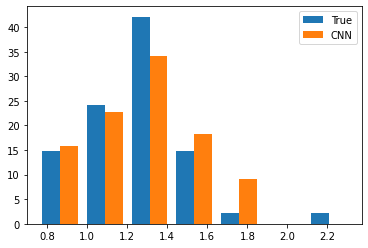

In [ ]:
A = plt.hist(X,weights=wts,bins=7)
plt.legend(['True','CNN'])

In [ ]:
B = A[0][0]

In [ ]:
Novo = []
k = 0
soma = 0
for i in B:
  if(k<4):
    Novo.append(i)
  else:
    soma = soma + i
  k = k + 1
Novo.append(soma)
print(Novo)

[14.736842105263156, 24.2105263157895, 42.1052631578948, 14.736842105263179, 4.21052631578948]


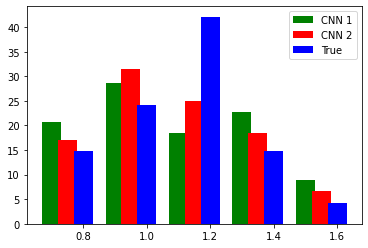

In [ ]:
# Freq1 = [19.12043703, 29.22484843, 19.35872174, 20.82190224, 11.47409056] # avarage 4 samples
Freq1 = [20.69301557, 28.55598044, 18.50768331, 22.7106327, 8.905907357] # avarage 10 samples
#Freq2 = [16.93792791, 31.38008965, 24.93810752, 18.56158392, 6.233810752, 0.4]
Freq2 = [16.93792791, 31.38008965, 24.93810752, 18.56158392, 6.633810752]
Freq3 = Novo
barWidth = 0.25

br1 = range(len(Freq1))
# Set position of bar on X axis
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
# labels = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8]
labels = [0.8, 1.0, 1.2, 1.4, 1.6]

xx=[]
for a in labels:
  xx.append(str(a))
plt.bar(br1, Freq1 , color="green", align="center", width=0.3, tick_label= xx) 
plt.bar(br2, Freq2 , color="red", align="center", width=0.3, tick_label= xx)
plt.bar(br3, Freq3 , color="blue", align="center", width=0.3, tick_label= xx)
plt.legend(['CNN 1','CNN 2','True'])